In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [171]:
# Reading CSV file
file1 = "oasis_longitudinal.csv"
data = pd.read_csv(file1)



In [236]:
data.columns


Index(['Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [173]:
# Displaying basic statistics about the numerical columns
print("\nBasic statistics:")
print(data.describe())


Basic statistics:
            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%  

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [175]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [177]:

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


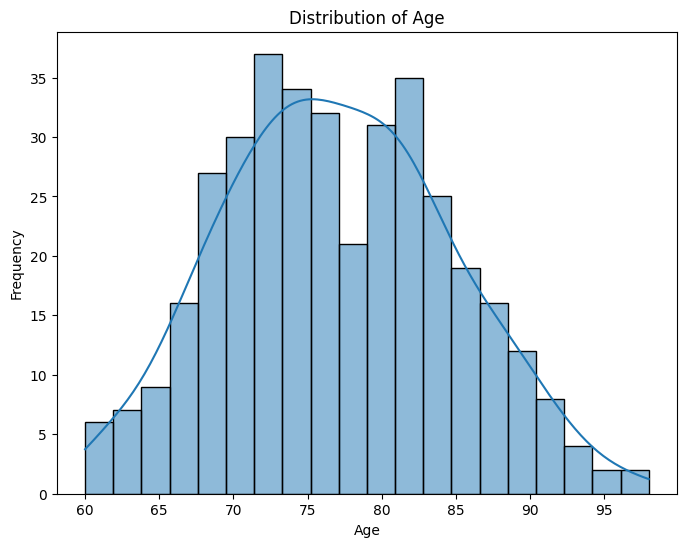

In [201]:
# Histogram for 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


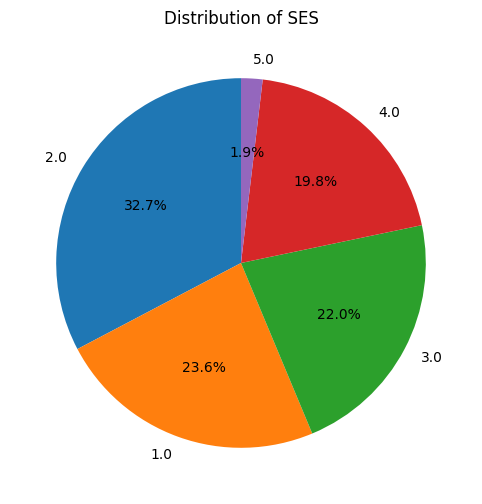

In [207]:
# Pie chart for 'SES' (Socioeconomic Status)
plt.figure(figsize=(8, 6))
data['SES'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of SES')
plt.ylabel('')
plt.show()


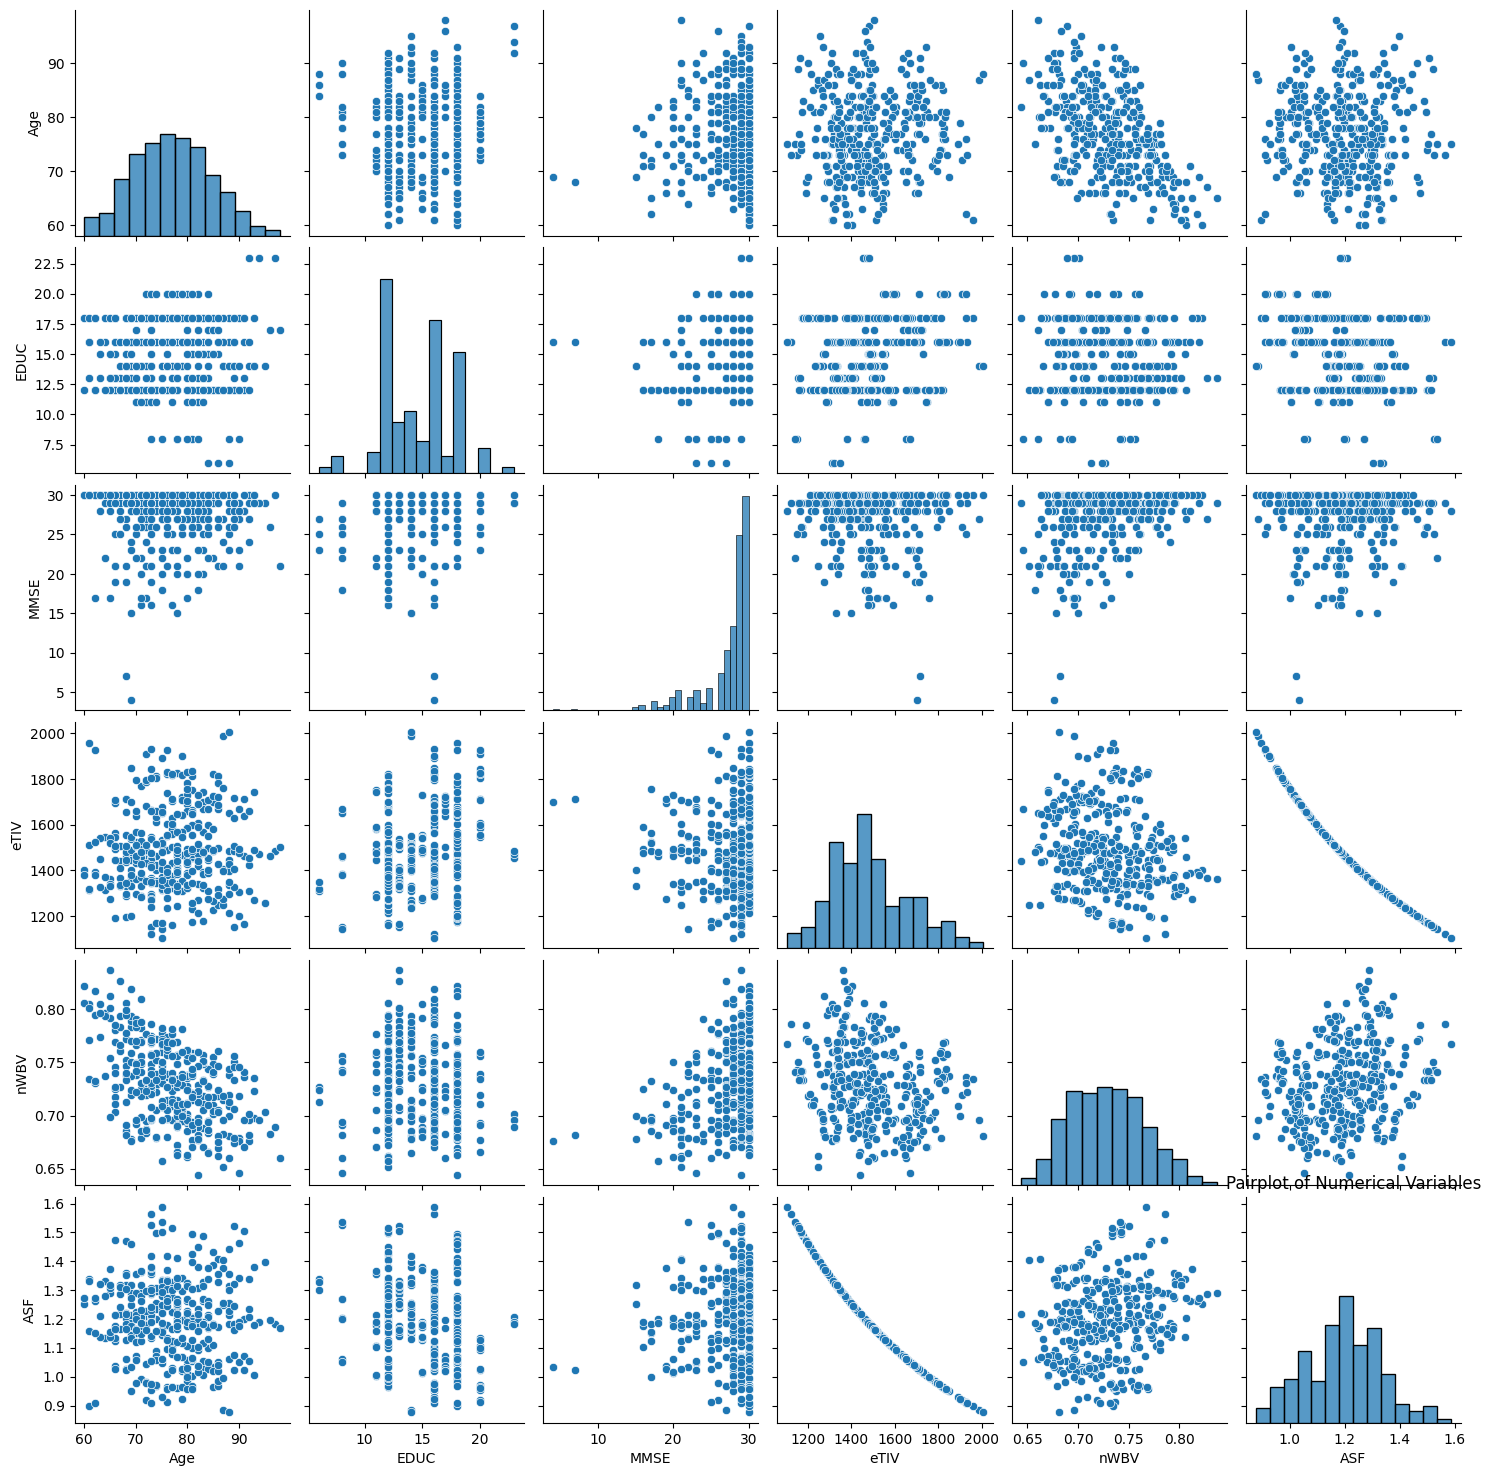

In [208]:
# Pairplot for numerical columns
sns.pairplot(data[['Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF']])
plt.title('Pairplot of Numerical Variables')
plt.show()


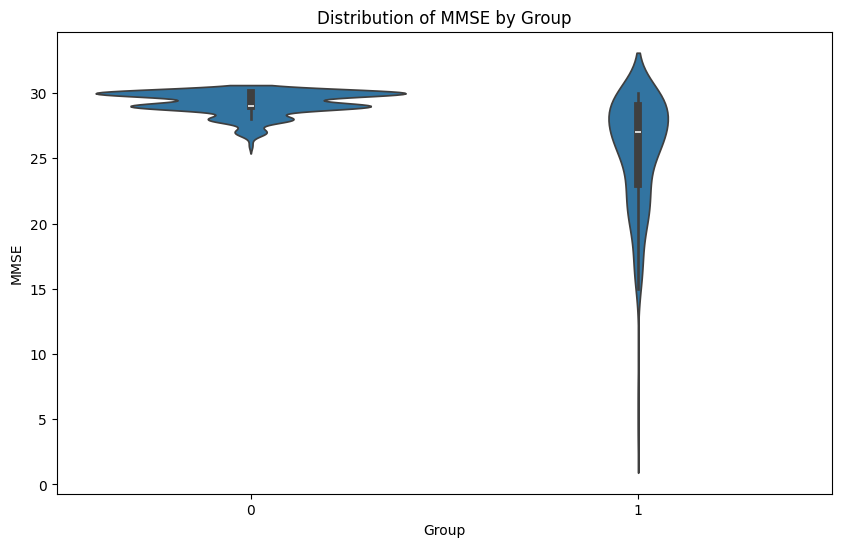

In [209]:
# Violin plot for 'MMSE' by 'Group'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='MMSE', data=data)
plt.title('Distribution of MMSE by Group')
plt.xlabel('Group')
plt.ylabel('MMSE')
plt.show()


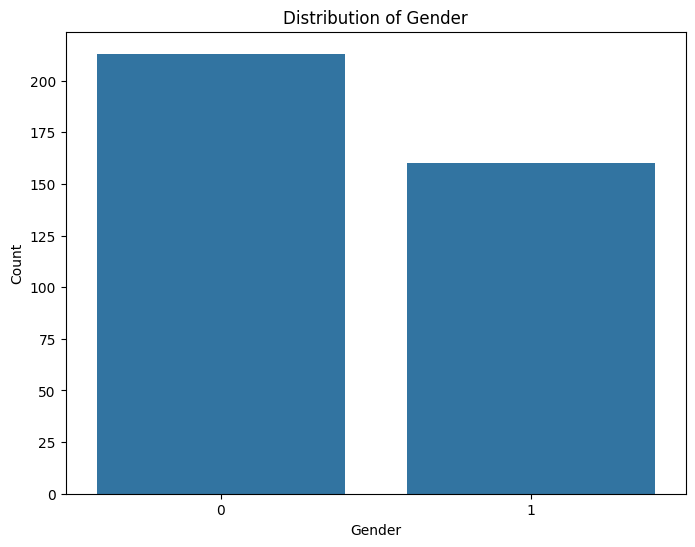

In [202]:
# Bar plot for 'M/F' column
plt.figure(figsize=(8, 6))
sns.countplot(x='M/F', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


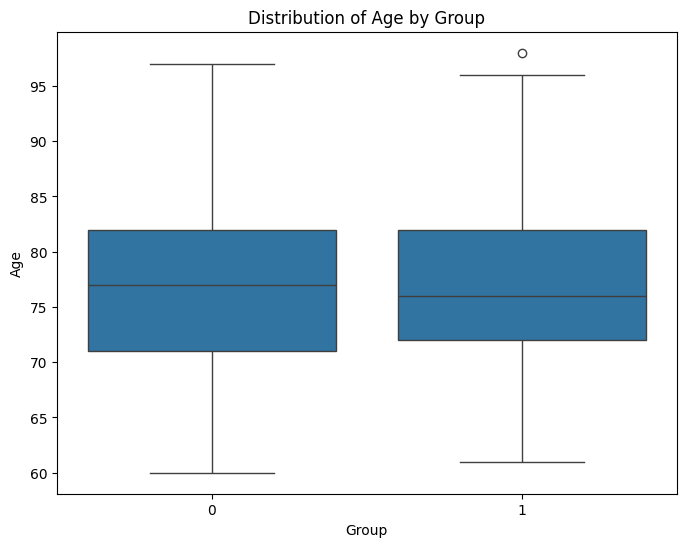

In [203]:
# Box plot for 'Age' by 'Group'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Age', data=data)
plt.title('Distribution of Age by Group')
plt.xlabel('Group')
plt.ylabel('Age')
plt.show()


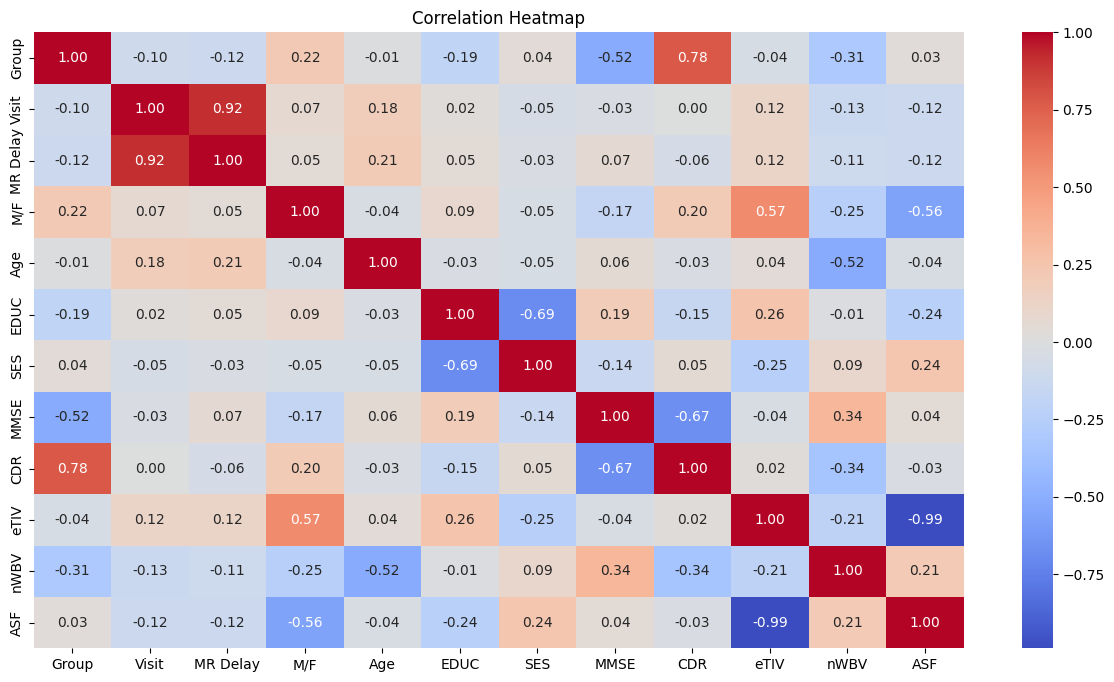

In [206]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



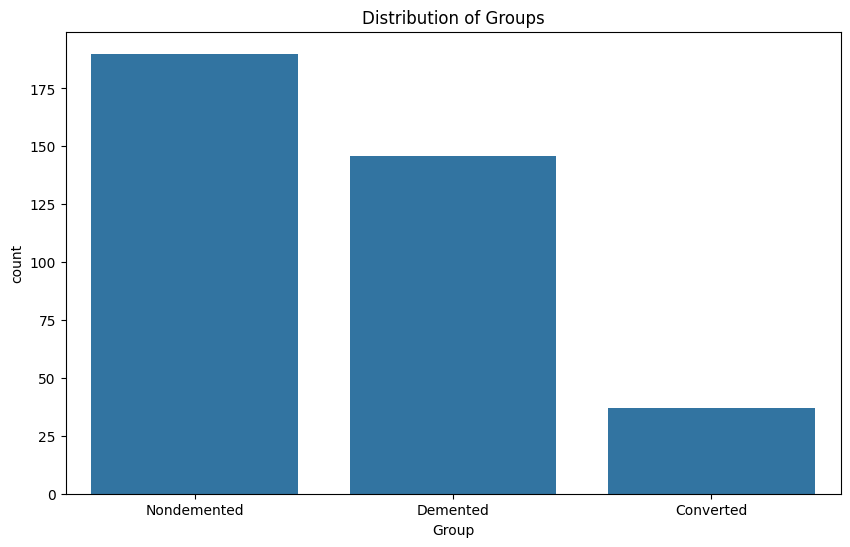

In [178]:

# Visualize the data
plt.figure(figsize=(10, 6))
sns.countplot(x='Group', data=data)
plt.title('Distribution of Groups')
plt.show()



In [179]:
# Step 2: Feature Selection
# Drop unnecessary columns
unnecessary_columns = ['Subject ID', 'MRI ID', 'Hand']  # Columns to drop
data.drop(columns=unnecessary_columns, inplace=True)

data.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [183]:


data['Group'] = data['Group'].replace(['Converted'], ['Demented'])

In [184]:
data['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

In [185]:


data['M/F'] = data['M/F'].replace(['F', 'M'], [0, 1])
data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1, 0])

In [186]:
# Fill with mode values
data['SES'] = data['SES'].fillna(value= data['SES'].mode().iloc[0])
# Fill with mean values
data['MMSE'] = data['MMSE'].fillna(value =data['MMSE'].median())

In [187]:
data.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [188]:
print(data.isnull().sum())

Group       0
Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64


In [189]:
numerical_features = ['Age', 'EDUC',  'MMSE', 'eTIV', 'nWBV', 'ASF']
categorical_features = ['M/F', 'SES']

In [190]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Group'])
y = data['Group']

In [191]:
# Outlier detection
outlier_detector = LocalOutlierFactor(contamination=0.05)
outliers = outlier_detector.fit_predict(X)
X = X[outliers == 1]
y = y[outliers == 1]

In [192]:
#numerical transformer and categorical transformer
numerical = MinMaxScaler()
categorical = OneHotEncoder(drop='first')
 
p = ColumnTransformer(transformers=[('num', numerical, numerical_features),
                                    ('cat', categorical, categorical_features)])

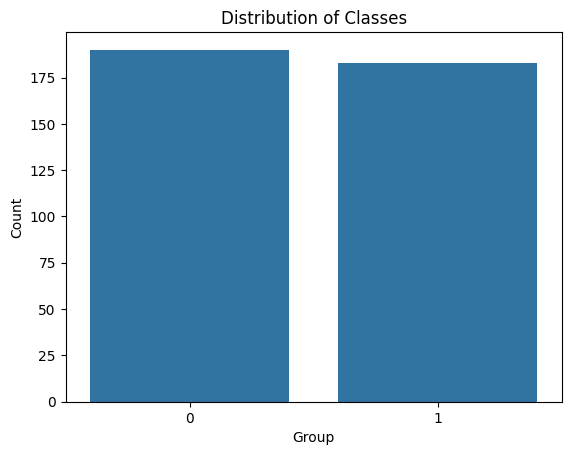

In [193]:
sns.countplot(data=data, x='Group')
plt.title("Distribution of Classes")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()

In [196]:
y.unique()

array([1, 0], dtype=int64)

In [197]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [198]:
y_train.unique()

array([0, 1], dtype=int64)

In [229]:

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=82)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9642857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.92      0.96        52

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.97      0.96      0.96       112



In [231]:
import pickle

# Save the trained model to a pickle file
model_file = "random_forest_model.pkl"
with open(model_file, 'wb') as f:
    pickle.dump(rf_classifier, f)

# Load the trained model from the pickle file
with open(model_file, 'rb') as f:
    loaded_model = pickle.load(f)




In [233]:
example_data = X_test.iloc[0:5]

In [234]:
example_data

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
186,2,751,1,80,12,4.0,20.0,1.0,1494,0.661,1.175
73,2,1123,1,85,12,4.0,29.0,0.5,1487,0.717,1.180
200,3,1412,1,74,18,1.0,29.0,0.0,1814,0.679,0.967
253,2,647,0,74,11,4.0,30.0,0.0,1517,0.705,1.157
282,2,846,0,75,16,2.0,28.0,0.0,1106,0.767,1.587


In [232]:
# Data for prediction
example_data = X_test.iloc[0:5]  # Predicting on the first 5 samples of the test set
actual_labels = y_test.iloc[0:5]  # Actual labels corresponding examples

# Make predictions using the loaded model
predictions = loaded_model.predict(example_data)

# Print actual labels and predictions for comparison
print("Actual Labels:", actual_labels)
print("Predictions:", predictions)

Actual Labels: 186    1
73     1
200    0
253    0
282    0
Name: Group, dtype: int64
Predictions: [1 1 0 0 0]


Random Forest Classifier

In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prepare data
X = data.drop('Group', axis=1)
y = data['Group']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=82)

# Initializing and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating and printing classification report for classifier
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_model.predict(X_test)))

Accuracy: 0.9642857142857143
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.92      0.96        52

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.97      0.96      0.96       112



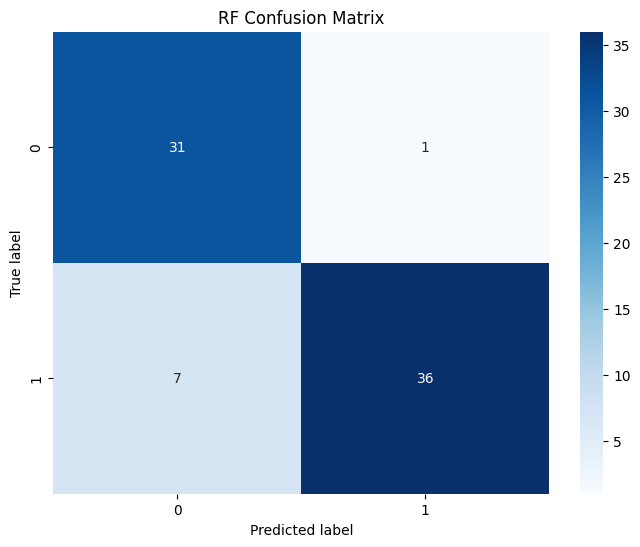

In [212]:

# Calculate confusion matrix for RF
cm_knn = confusion_matrix(y_test, rf_model.predict(X_test))

# Plot confusion matrix for RF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

KNN

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define parameter grid for grid search
param_grid = {'n_neighbors': [51, 71],  # Try different numbers of neighbors
              'weights': ['uniform', 'distance'],  # Explore different weightings
              'metric': ['euclidean', 'manhattan']}  # Explore different distance metrics

# Initialize and train KNN with grid search for parameter tuning
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=55, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predictions
knn_y_pred = grid_search.predict(X_test)

# Evaluate KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy)

# Calculating and printing classification report for classifier
print("Classification Report for KNN:")
print(classification_report(y_test, knn_y_pred))


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 71, 'weights': 'distance'}
KNN Accuracy: 0.49333333333333335
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.44      0.69      0.54        32
           1       0.60      0.35      0.44        43

    accuracy                           0.49        75
   macro avg       0.52      0.52      0.49        75
weighted avg       0.53      0.49      0.48        75



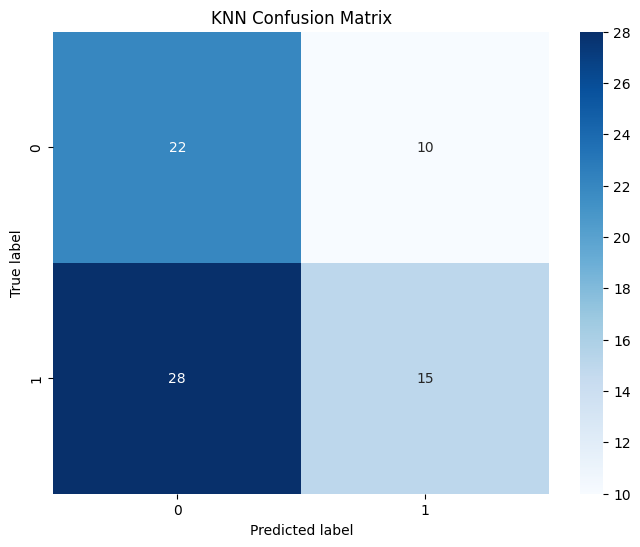

In [214]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate confusion matrix for KNN
cm_knn = confusion_matrix(y_test, grid_search.predict(X_test))

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# Initializeing and train Gaussian Process
gp_model = GaussianProcessClassifier()
gp_model.fit(X_train, y_train)

# Predictions
gp_y_pred = gp_model.predict(X_test)

# Evaluating Gaussian Process model
gp_accuracy = accuracy_score(y_test, gp_y_pred)
print("Gaussian Process Accuracy:", gp_accuracy)

print("\nClassification Report for Gaussian Process:")
print(classification_report(y_test, gp_model.predict(X_test)))




Gaussian Process Accuracy: 0.49333333333333335

Classification Report for Gaussian Process:
              precision    recall  f1-score   support

           0       0.43      0.59      0.50        32
           1       0.58      0.42      0.49        43

    accuracy                           0.49        75
   macro avg       0.51      0.51      0.49        75
weighted avg       0.52      0.49      0.49        75



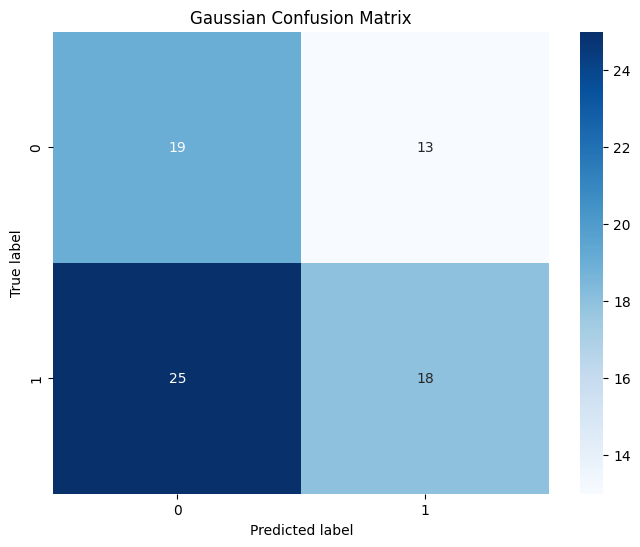

In [221]:
# Calculate confusion matrix for Gaussian
cm_gp = confusion_matrix(y_test, gp_model.predict(X_test))

# Plot confusion matrix for Gaussian
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gp, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

MLP Classifier

In [216]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define a neural network architecture
nn_model = MLPClassifier(hidden_layer_sizes=(50, 10), activation='relu', solver='adam', 
                         alpha=0.0001, learning_rate_init=0.001, max_iter=2500)

# Train the model
nn_model.fit(X_train, y_train)

# Predictions
nn_y_pred = nn_model.predict(X_test)

# Evaluating Neural Network model
nn_accuracy = accuracy_score(y_test, nn_y_pred)
print("Neural Network Accuracy:", nn_accuracy)

print("\nClassification Report for Neural Network:")
print(classification_report(y_test, nn_y_pred))


Neural Network Accuracy: 0.6

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.53      0.50      0.52        32
           1       0.64      0.67      0.66        43

    accuracy                           0.60        75
   macro avg       0.59      0.59      0.59        75
weighted avg       0.60      0.60      0.60        75



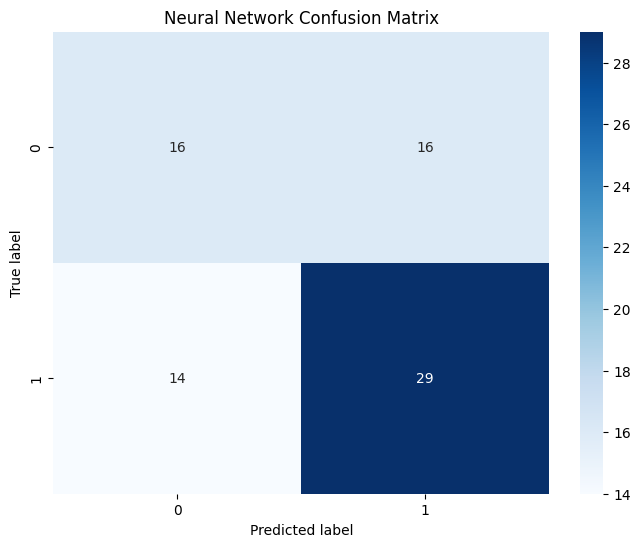

In [217]:
# Calculate confusion matrix for Neural Network
cm_nn = confusion_matrix(y_test, nn_model.predict(X_test))

# Plot confusion matrix for Neural Network
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [218]:



# Initializing and train Gradient Boosted Trees
gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

# Predictions
gbt_y_pred = gbt_model.predict(X_test)

# Evaluating Gradient Boosted Trees model
gbt_accuracy = accuracy_score(y_test, gbt_y_pred)
print("Gradient Boosted Trees Accuracy:", gbt_accuracy)

print("\nClassification Report for Gradient-Boosted Trees:")
print(classification_report(y_test, gbt_model.predict(X_test)))

Gradient Boosted Trees Accuracy: 0.8666666666666667

Classification Report for Gradient-Boosted Trees:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.95      0.81      0.88        43

    accuracy                           0.87        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.88      0.87      0.87        75



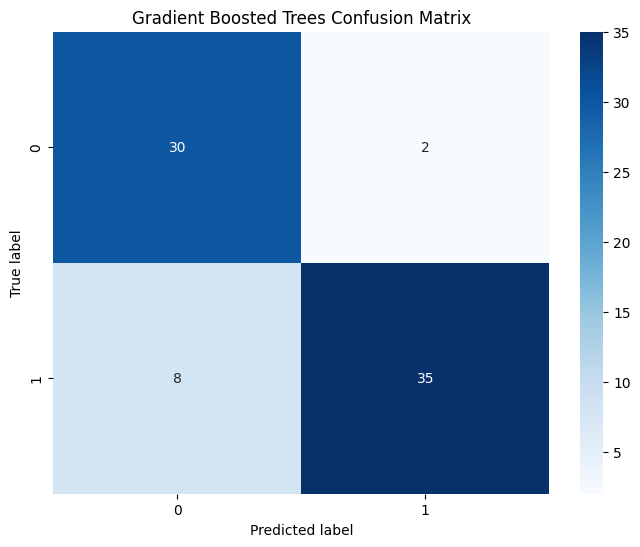

In [219]:
# Calculate confusion matrix for Gradient Boosted Trees
cm_gbt = confusion_matrix(y_test, gbt_model.predict(X_test))

# Plot confusion matrix for Gradient Boosted Trees
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbt, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosted Trees Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()